# 6.5: Unsupervised Machine Learning: Clustering - Task

### This script contains the following:

#### 1. Importing libraries and data and removing non-numeric columns
#### 2. The elbow technique
#### 3. k-means clustering

## Step 1

### Importing libraries and data and removing non-numeric columns

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## Step 2

In [3]:


path=r'C:\Users\19452\Desktop\Seema\Careerfoundry-Data Analytics Course\Work Area\Data Immersion\Achievement 6\PythonProject-NewYorkCityAirbnb\02 Data\Prepared Data'

In [4]:
df=pd.read_csv(os.path.join(path,'6.3','NewYorkCityAirbnb_Clean.csv'),index_col=False)

In [5]:
df.shape

(48895, 14)

In [6]:
df.head()

,Unnamed: 0,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_category,available_category
0,0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,Cheapest price,Very Long term
1,1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,Cheapest price,Very Long term
2,2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,Cheapest price,Very Long term
3,3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,Cheapest price,Long term
4,4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,Cheapest price,Short term


### Step 2.a.

In [7]:
# drop non-numeric columns from the dataset to perform K-means algorithm

df=df.drop(columns=['Unnamed: 0','host_id','neighbourhood_group','neighbourhood','room_type','price_category','available_category'])

In [8]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,6,365
1,40.75362,-73.98377,225,1,45,2,355
2,40.80902,-73.94190,150,3,0,1,365
3,40.68514,-73.95976,89,1,270,1,194
4,40.79851,-73.94399,80,10,9,1,0


### Step 2.b.

### The columns such as 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count' and 'availability_365' are all measured in days.  No standardization of data is required.

## Step 3

### 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\19452\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\19452\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\19452\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\19452\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-3837678462.073008,
 -2385909142.152778,
 -1644614806.9425418,
 -1120560546.264457,
 -845735894.1092196,
 -720589181.3761345,
 -624376323.7649267,
 -541291777.5149422,
 -476397214.9078711]

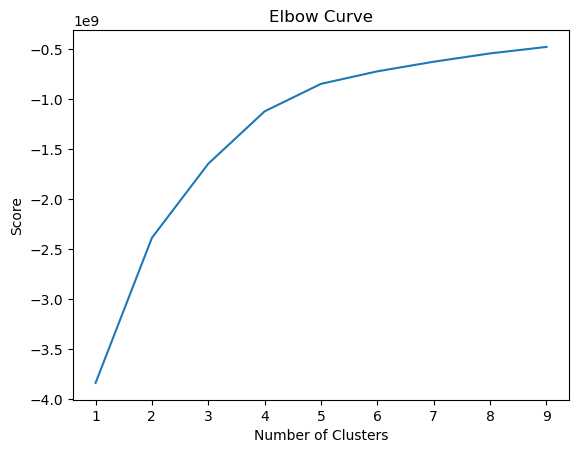

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Step 4

#####  In this Elbow curve, there's a smooth jump from four to five on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is five.

## Step 5

### 3. k-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\19452\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

## Step 6

In [14]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\19452\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,clusters
0,40.64749,-73.97237,149,1,9,6,365,3
1,40.75362,-73.98377,225,1,45,2,355,3
2,40.80902,-73.94190,150,3,0,1,365,3
3,40.68514,-73.95976,89,1,270,1,194,3
4,40.79851,-73.94399,80,10,9,1,0,0


In [16]:
df['clusters'].value_counts()

clusters
0    30813
3    15162
4     2746
2      148
1       26
Name: count, dtype: int64

## Step 7 - Visualizations using scatterplots

C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


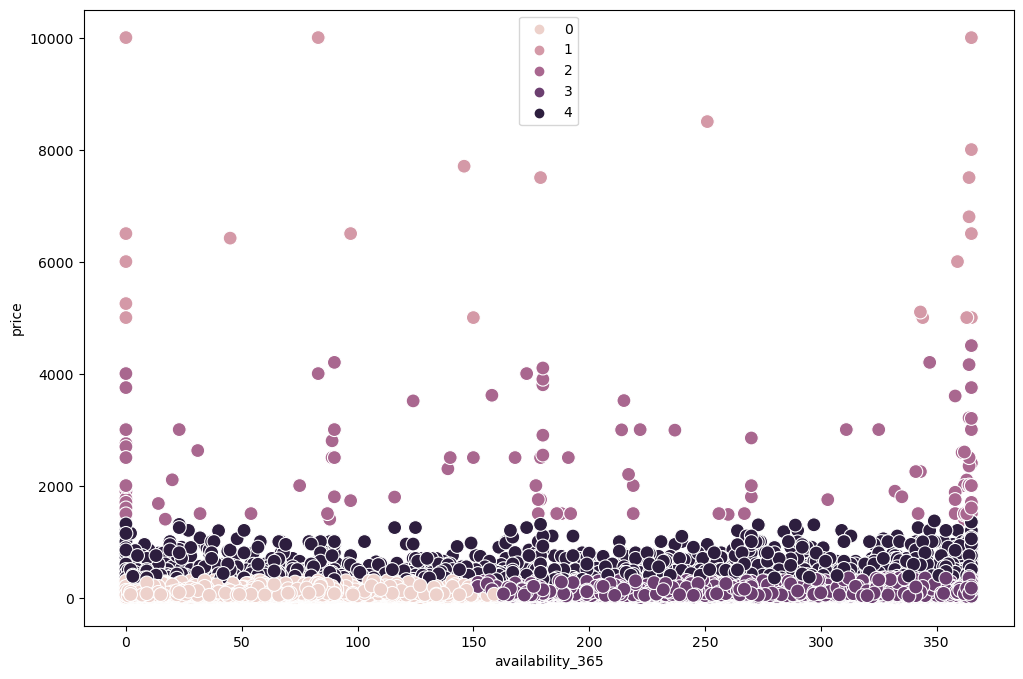

In [17]:
# Plot the clusters for the "price" and "availability_365" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['availability_365'], y=df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('availability_365') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\19452\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


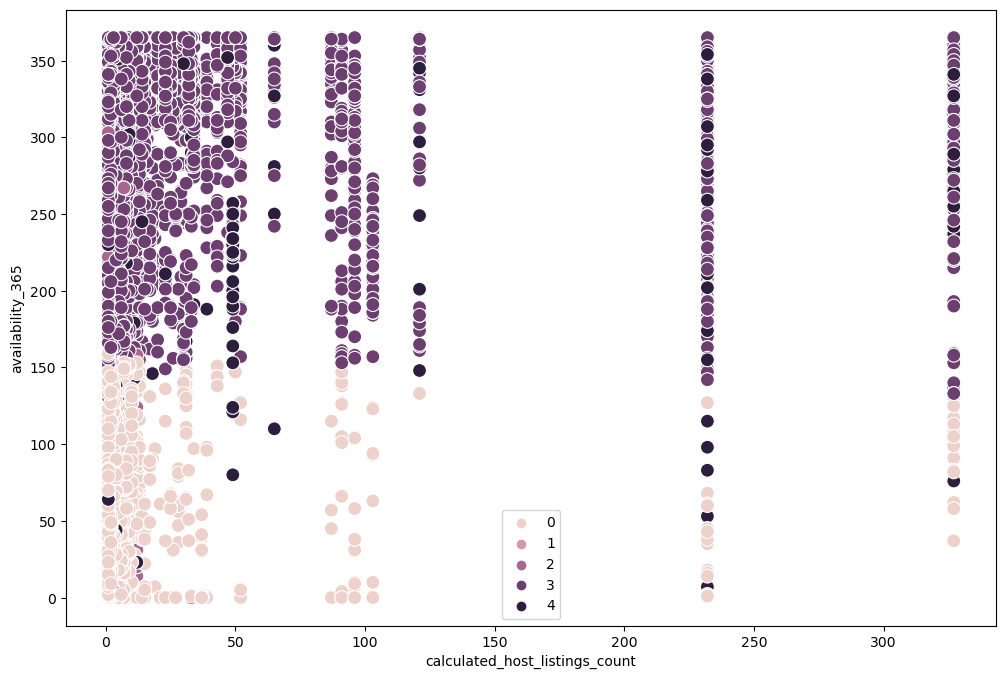

In [18]:
# Plot the clusters for the "availability_365" and "calculated_host_listings_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['calculated_host_listings_count'], y=df['availability_365'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('calculated_host_listings_count') 
plt.ylabel('availability_365') 
plt.show()

In [19]:
df.loc[df['clusters'] == 4, 'cluster'] = 'darkest purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'darker purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'lilac'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'


C:\Users\19452\AppData\Local\Temp\ipykernel_19532\385105199.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'darkest purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['clusters'] == 4, 'cluster'] = 'darkest purple'


## Step 8

#### price vs availability:

The clusters do partially make sense.
Center Area (Lilac and Darker Purple): This area is more spread out, potentially containing listings with a wider range of prices and availabilities. It might be worth investigating if this central area can be further divided into sub-clusters.  Darker Purple generally has the smallest differences between the mean and median values.

The Pink, Lilac and Darkest Purple Clusters exhibits slightly larger differences, indicating slightly more variability within those clusters

Top Right (Purple): This cluster likely represents high-priced listings with lower availability.

Bottom Left (Pink): This cluster likely represents lower-priced listings with higher availability.


#### calculated_host_listings_count vs availability:

Does not specifically show any trend.

## Step 9

In [20]:
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'availability_365':['mean', 'median'], 
                         'calculated_host_listings_count':['mean', 'median']
                          })

price         availability_365         \
                       mean  median             mean median   
cluster                                                       
darker purple    128.922701   110.0       281.437211  298.0   
darkest purple   517.453387   450.0       156.225783  145.0   
lilac           7087.269231  6500.0       178.115385  148.0   
pink             116.021841   100.0        25.539577    0.0   
purple          2245.777027  2000.0       180.500000  179.5   

               calculated_host_listings_count         
                                         mean median  
cluster                                               
darker purple                       15.953106    2.0  
darkest purple                      15.241442    1.0  
lilac                                2.538462    1.0  
pink                                 2.112517    1.0  
purple                               2.783784    1.0

In [21]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,clusters,cluster
0,40.64749,-73.97237,149,1,9,6,365,3,darker purple
1,40.75362,-73.98377,225,1,45,2,355,3,darker purple
2,40.80902,-73.94190,150,3,0,1,365,3,darker purple
3,40.68514,-73.95976,89,1,270,1,194,3,darker purple
4,40.79851,-73.94399,80,10,9,1,0,0,pink


In [25]:
# Export df_allmerge dataframe to the prepare data folder as 'allmergedata_1.pkl'

df.to_csv(os.path.join(path,'6.5','NewYorkCityAirbnb_Clean.csv'),index=False)

## Step 10

### A more comprehensive understanding of the clusters can be gained and whether they effectively capture meaningful subgroups within the Airbnb data. It's possible that the current clustering might need refinement based on the insights uncovered from a more comprehensive analysis.  In case data points within a cluster significantly deviate from the cluster's mean or median, it could indicate unusual cases that require further investigation.  These clusters can be of help to understand host/customer behavior and demand for Airbnb market in NYC.